## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning algorithms
import sklearn 
import imblearn

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
plt.style.use('fivethirtyeight')

## Reading the DataSet

In [3]:
# Importing the data set
data = pd.read_csv('loan-train.csv')

## Data Description

In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001222,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [11]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Pre-Processing

In [12]:
# Duplicated data
data[data.duplicated() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [13]:
import missingno as msn

In [14]:
# Checking missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

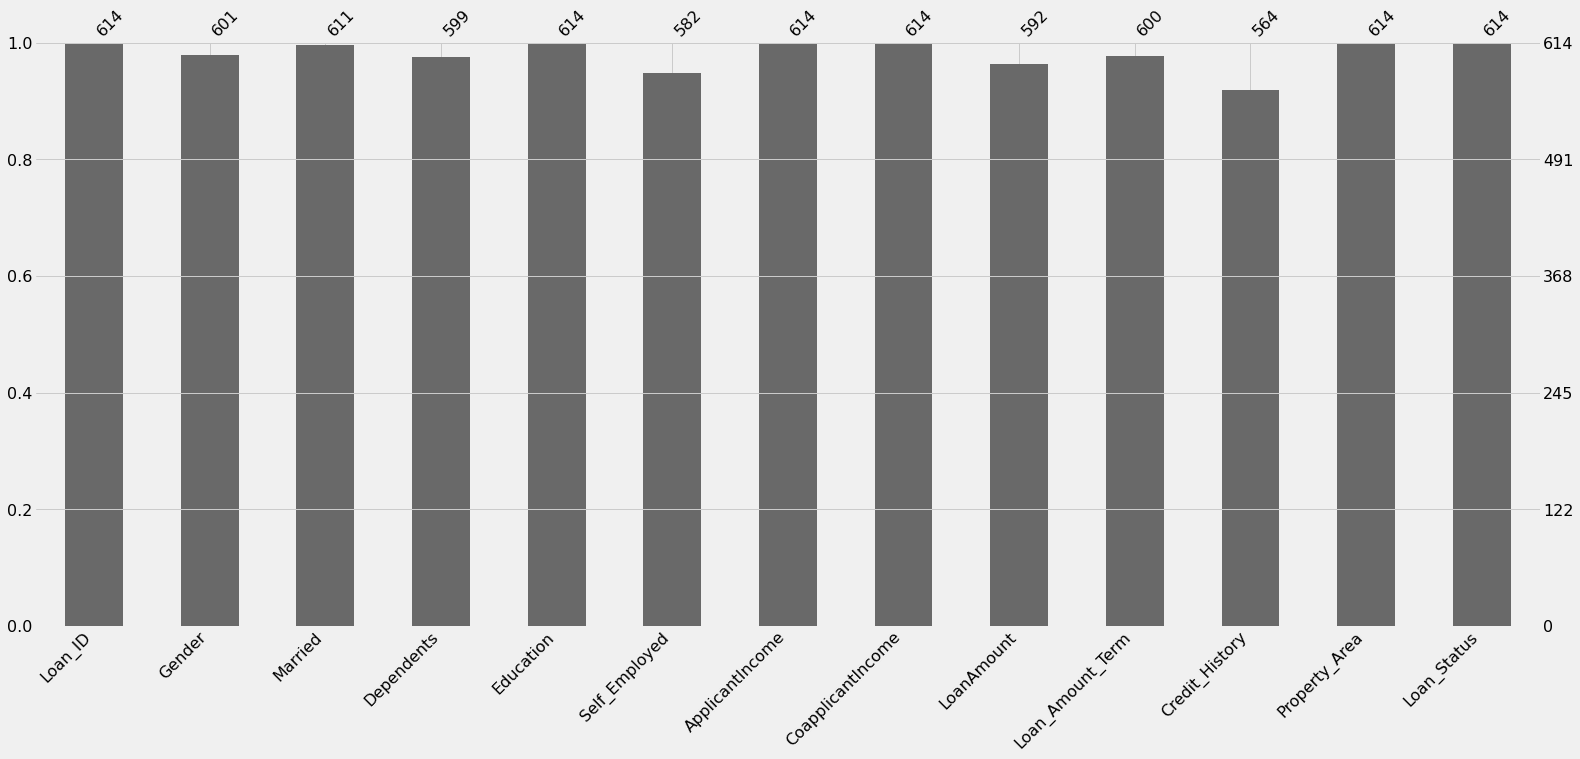

In [15]:
msn.bar(data)

<AxesSubplot:>

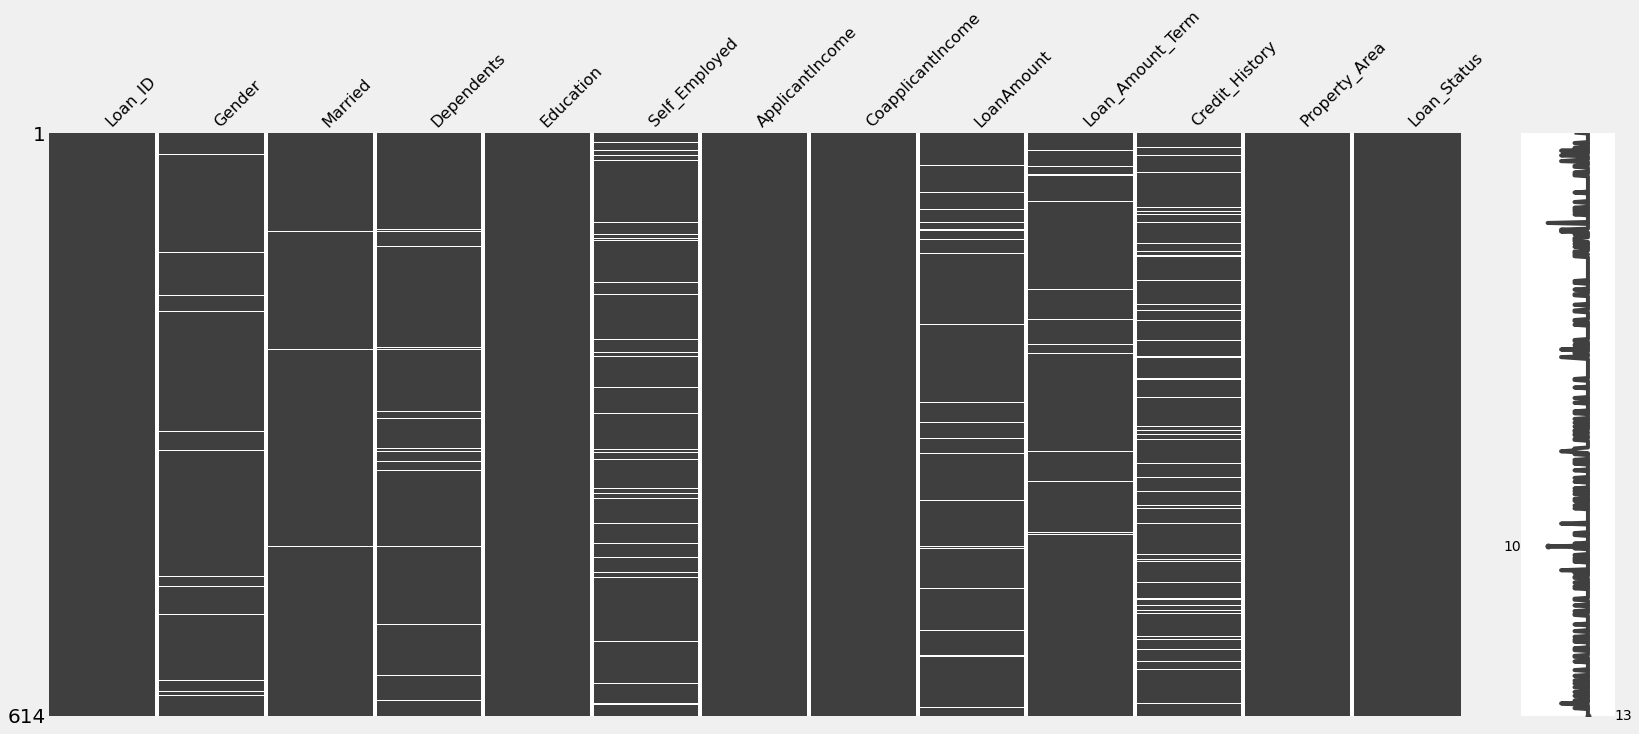

In [16]:
msn.matrix(data)

In [17]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [18]:
# using mode value to replace missing values in categorical columns
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# using median value to replace missing values in numerical columns
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())


In [19]:
data.isnull().sum().sum()

0

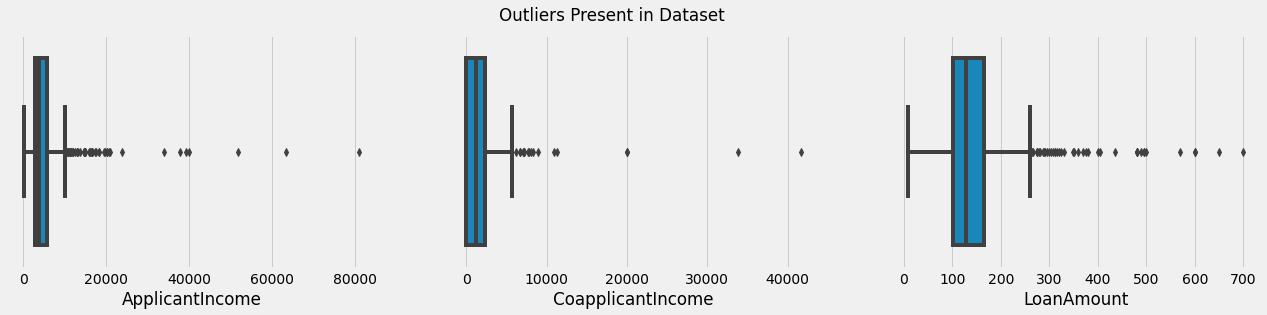

In [20]:
# Checking outliers using boxplot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,4)

plt.subplot(1,3,1)
sns.boxplot(x=data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(x=data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(x=data['LoanAmount'])

plt.suptitle('Outliers Present in Dataset')
plt.show()

In [21]:
# Removing the outliers
print("Before Removing Outliers",data.shape)

data = data[data['ApplicantIncome'] < 25000]

print("After Removing Outliers",data.shape)

Before Removing Outliers (614, 13)
After Removing Outliers (607, 13)


In [22]:
print("Before Removing Outliers",data.shape)

data = data[data['CoapplicantIncome'] < 10000]

print("After Removing Outliers",data.shape)

Before Removing Outliers (607, 13)
After Removing Outliers (601, 13)


In [23]:
print("Before Removing Outliers",data.shape)

data = data[data['LoanAmount'] < 400]

print("After Removing Outliers",data.shape)

Before Removing Outliers (601, 13)
After Removing Outliers (590, 13)


## Exploratory Data Analysis

### Univariate Analysis

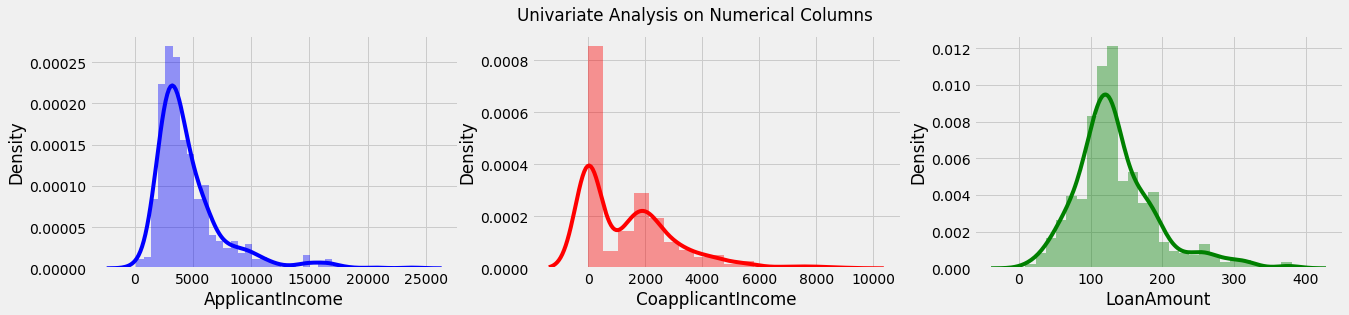

In [24]:
#Univariate Analysis on Numerical Columns

plt.rcParams['figure.figsize'] = (20,4)

plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color = "blue")

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color = "red")

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color = "green")

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

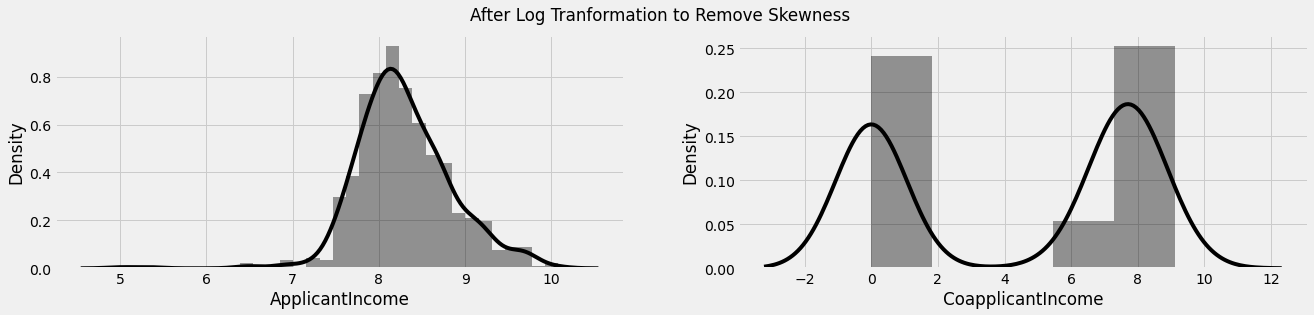

In [25]:
# Removing Skewness in Data

plt.rcParams['figure.figsize'] = (20,4)

data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome'], color = "black")

plt.subplot(1,2,2)
sns.distplot(data['CoapplicantIncome'], color = "black")

plt.suptitle('After Log Tranformation to Remove Skewness')
plt.show()

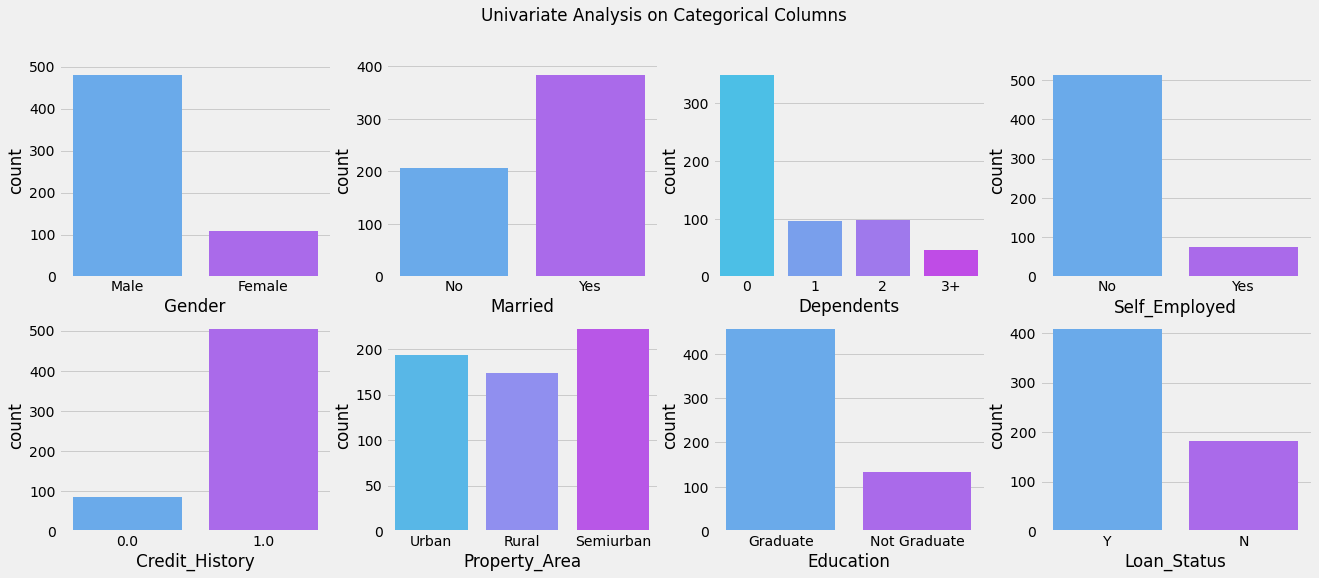

In [26]:
# Univariate Analysis on Categorical Columns

plt.rcParams['figure.figsize'] = (20,8)

plt.subplot(2,4,1)
sns.countplot(data['Gender'], palette = "cool")

plt.subplot(2,4,2)
sns.countplot(data['Married'], palette = "cool")

plt.subplot(2,4,3)
sns.countplot(data['Dependents'], palette = "cool")

plt.subplot(2,4,4)
sns.countplot(data['Self_Employed'], palette = "cool")

plt.subplot(2,4,5)
sns.countplot(data['Credit_History'], palette = "cool")

plt.subplot(2,4,6)
sns.countplot(data['Property_Area'], palette = "cool")

plt.subplot(2,4,7)
sns.countplot(data['Education'], palette = "cool")

plt.subplot(2,4,8)
sns.countplot(data['Loan_Status'], palette = "cool")

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

### Bivariate Analysis

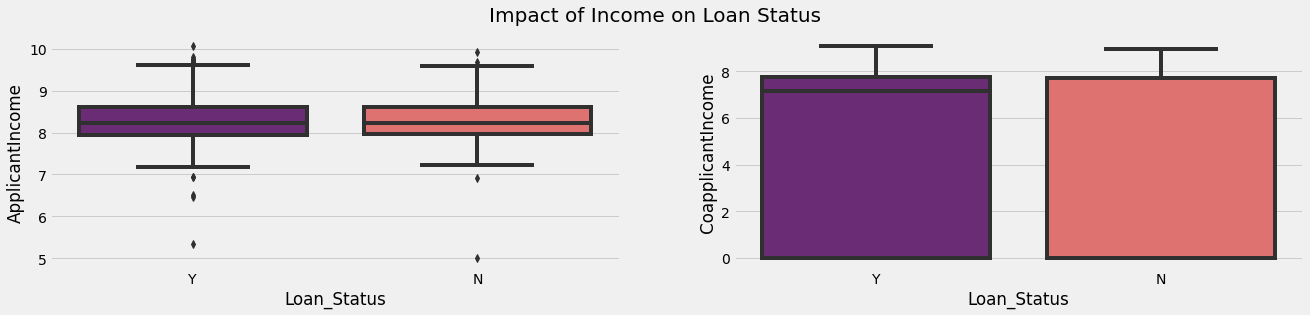

In [27]:
# Impact of Income of Applicant and Coaaplicant on Loan Status

plt.rcParams['figure.figsize'] = (20,4)

plt.subplot(1,2,1)
sns.boxplot(data['Loan_Status'], data['ApplicantIncome'], palette = "magma")

plt.subplot(1,2,2)
sns.boxplot(data['Loan_Status'], data['CoapplicantIncome'], palette = "magma")

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()

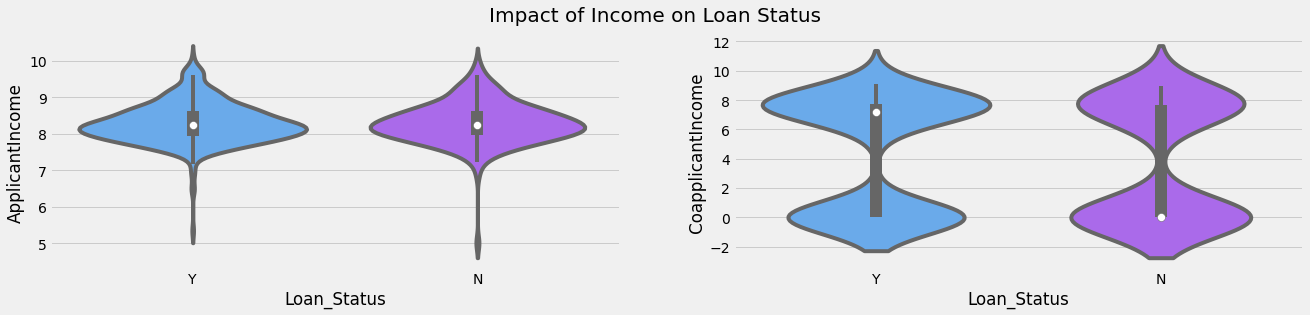

In [28]:
plt.rcParams['figure.figsize'] = (20,4)

plt.subplot(1,2,1)
sns.violinplot(x ="Loan_Status", y = "ApplicantIncome", data = data ,palette = "cool")

plt.subplot(1,2,2)
sns.violinplot(x ="Loan_Status", y = "CoapplicantIncome", data = data ,palette = "cool")

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()

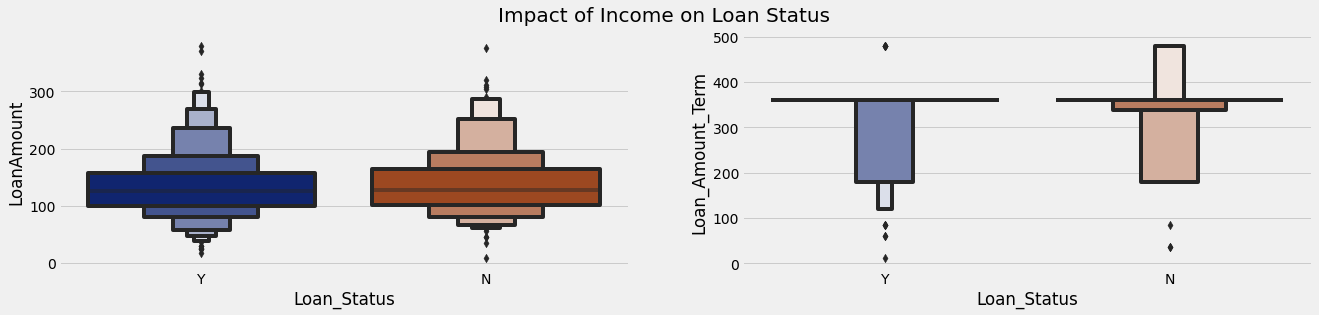

In [29]:
plt.rcParams['figure.figsize'] = (20,4)

plt.subplot(1,2,1)
sns.boxenplot(x ="Loan_Status", y = "LoanAmount", data = data ,palette = "dark")

plt.subplot(1,2,2)
sns.boxenplot(x ="Loan_Status", y = "Loan_Amount_Term", data = data ,palette = "dark")

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()

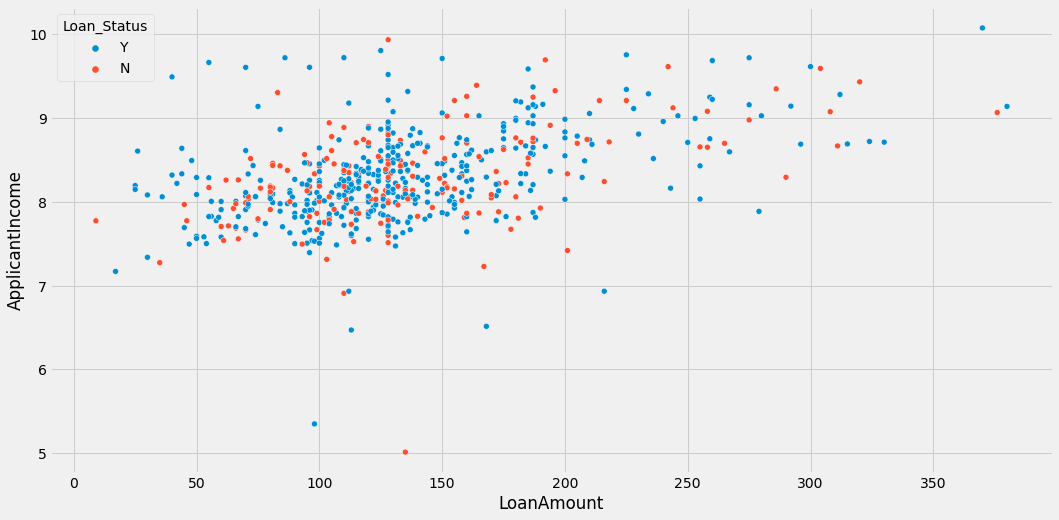

In [30]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = 'LoanAmount' , y = 'ApplicantIncome' , hue = 'Loan_Status', data = data)
plt.show()

In [31]:
# Comparing all the categorical data to Loan Status so as to understand the Overall Impact

print("Impact of Marraige on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Married']))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')

print("Impact of Education on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Education']))
print('\n')

print("Impact of Employment on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
print('\n')

print("Impact of Property on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Impact of Marraige on Loan Status
Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            110  33  24  15
Y            240  63  74  31


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129


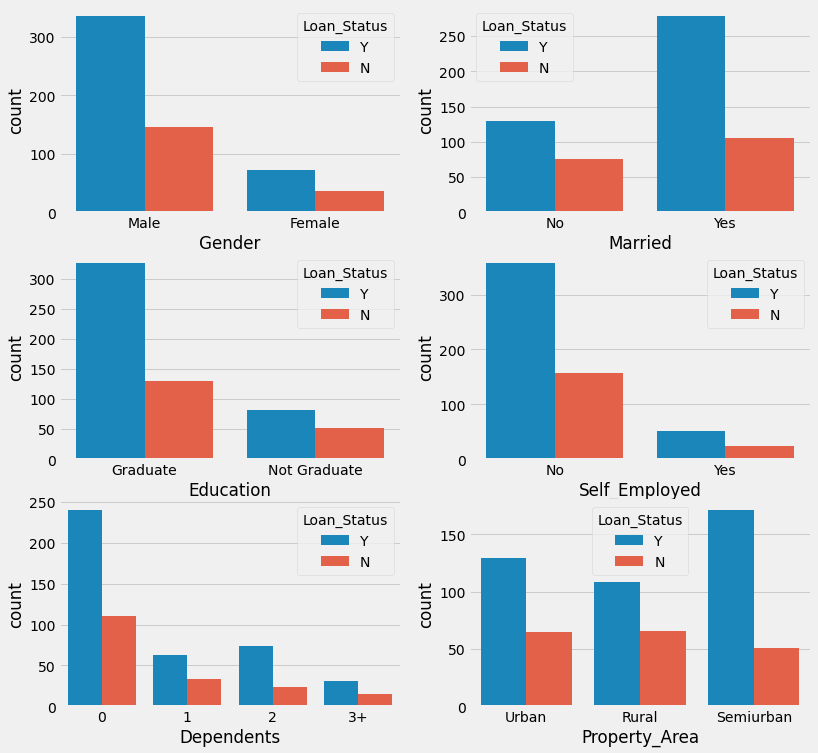

In [32]:
groups = ['Gender','Married','Education','Self_Employed','Dependents','Property_Area']
fig, ax = plt.subplots(3,2, figsize = (12,12))
axs=ax.ravel()
for i, group in enumerate(groups):
    sns.countplot(x = group, hue = 'Loan_Status',ax=axs[i], data=data)

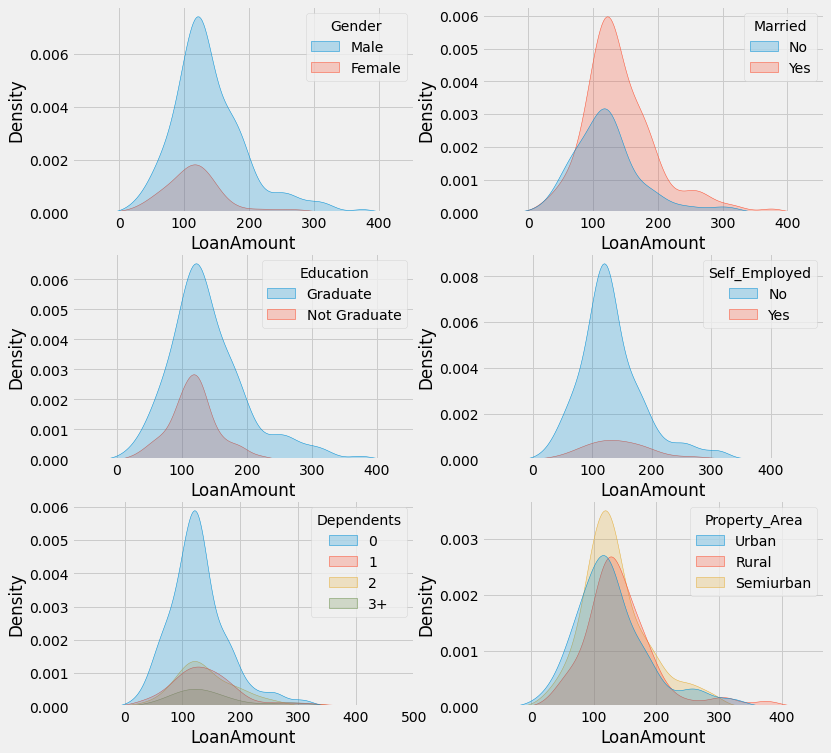

In [33]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
axs=ax.ravel()
for i, group in enumerate(groups):
    sns.kdeplot(x = 'LoanAmount' , hue = group,ax=axs[i], data=data, fill=True)

<AxesSubplot:>

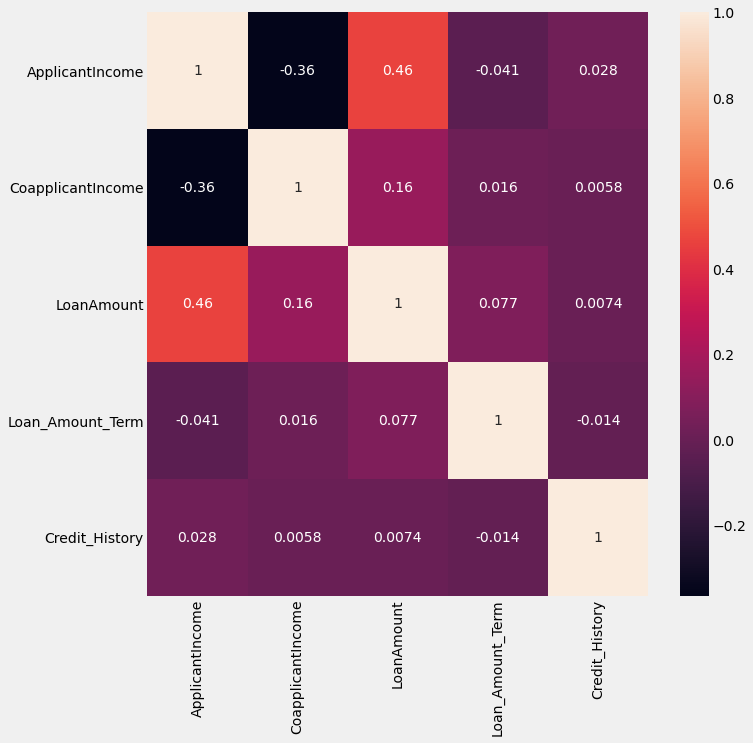

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)

## Data Preparation For Model

In [35]:
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [36]:
data = data.drop(['Loan_ID'], axis=1)
data.shape

(590, 12)

In [37]:
# Encoding the categorical columns

data['Gender'] = data['Gender'].replace(('Male', 'Female'), (1,0))
data['Married'] = data['Married'].replace(('Yes', 'No'), (1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'), (1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'), (1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'), (1,0))

#Merging similar data
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban', 'Rural'), (1,1,0))
data['Dependents'] = data['Property_Area'].replace(('1', '2', '3+','0'), (1,1,1,0))

data.select_dtypes('object').columns

Index([], dtype='object')

In [38]:
# Splitting the target column from the data

y= data['Loan_Status']
x= data.drop(['Loan_Status'], axis=1)

print("Shape of x", x.shape)
print("Shape of y", y.shape)

Shape of x (590, 11)
Shape of y (590,)


## Resampling the Dataset for Balancing Data

In [39]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


In [40]:
print("Before Resampling")
print(y.value_counts())

print("After Resampling")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling
1    408
0    182
Name: Loan_Status, dtype: int64
After Resampling
0    408
1    408
Name: 0, dtype: int64


In [41]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.20, random_state = 0)

print("Shape of x_train", x_train.shape)
print("Shape of x_test", x_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of x_train (652, 11)
Shape of x_test (164, 11)
Shape of y_train (652, 1)
Shape of y_test (164, 1)


## Machine Learning Modelling - Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression(solver = "liblinear")
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [44]:
y_pred = model.predict(x_test)
print("Training Accuracy: ", model.score(x_train,y_train))
print("Testing Accuracy: ", model.score(x_test,y_test))

Training Accuracy:  0.7791411042944786
Testing Accuracy:  0.8170731707317073


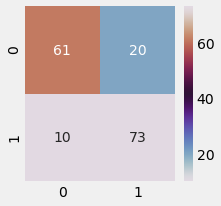

In [45]:
#Analyze performance using Confusion  Matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'twilight', fmt = '.8g')
plt.show()

## Model Evaluation

In [46]:
#Analyze performance using Classification Report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        81
           1       0.78      0.88      0.83        83

    accuracy                           0.82       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.82      0.82      0.82       164

